Sample Data:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Accuracy: 0.9838565022421525

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



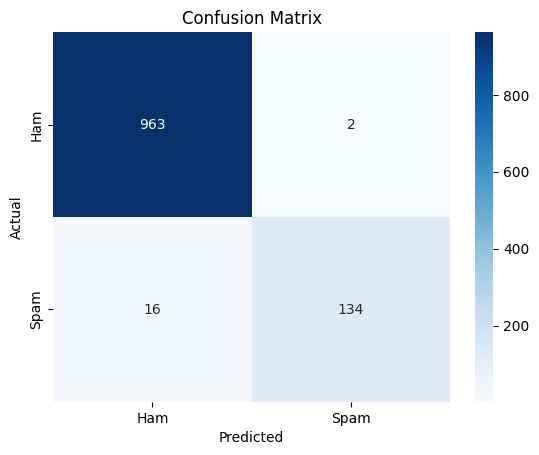

Enter a message to check if it's Spam or Not Spam: congratulations!you've won a free iphone
The message is: SPAM


In [13]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load Dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
print("Sample Data:")
print(df.head())

# Step 3: Convert labels to binary
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42
)

# Step 5: Convert text to vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 6: Train the model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 7: Predict
y_pred = model.predict(X_test_vec)

# Step 8: Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Predict Custom Input
msg = input("Enter a message to check if it's Spam or Not Spam: ")
msg_vec = vectorizer.transform([msg])
prediction = model.predict(msg_vec)

if prediction[0] == 1:
    print("The message is: SPAM")
else:
    print(" The message is: NOT SPAM (Ham)")
